# 泰坦尼克号预测分析2

## 1.数据总览

In [1]:
import re 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')
# sns.set_style('whitegrid')
train_data[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
train_data.info()
print('-' * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

### 绘制存活的比例

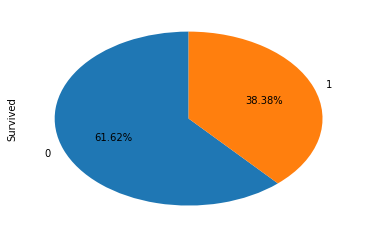

In [4]:
train_data['Survived'].value_counts().plot.pie(labeldistance=1.1,     # 标签与图的距离
                                               autopct='%1.2f%%',     # 圆里的文本格式
                                               shadow=False,          # 饼是否有阴影
                                               startangle=90,         # 起始角度，0，表示从0开始逆时针转，一般选择90
                                               pctdistance=0.6)       # 饼状图返回值

## 2.缺失数据处理：
* 1.如果数据集很多，缺失值很少，可以删除带缺失值的行
* 2.如果该属性相对机器学习来说不是很重要，可以对缺失值赋均值或者众数
* 3.对于标称属性，缺失本身也可能代表着一些属性
* 4.使用随机森林等模型预测缺失属性的值

In [5]:
from sklearn.ensemble import RandomForestRegressor 

age_df = train_data[['Age', 'Survived', 'Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:, 1:]
Y = age_df_notnull.values[:, 0]

# 用随机森林回归训练数据
rfr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rfr.fit(X, Y)
predictAges = rfr.predict(age_df_isnull.values[:, 1:])
train_data.loc[train_data['Age'].isnull(), ['Age']] = predictAges

In [6]:
train_data['Cabin'] = train_data.Cabin.fillna('U0')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 3.分析数据关系

### 3.1 性别与生存与否的关系

In [8]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [9]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


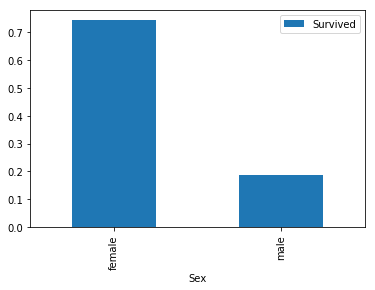

In [10]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()

### 3.2船舱等级和生存的关系

In [11]:
train_data.groupby(['Pclass', 'Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

In [12]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


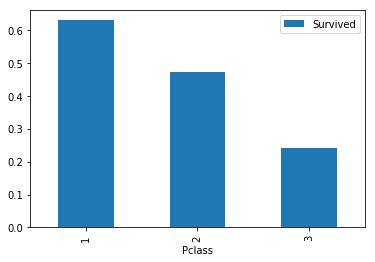

In [13]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()

### 3.3不同等级的船舱男女生存率

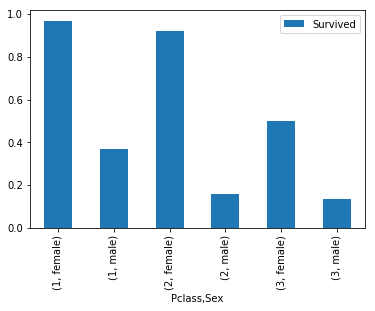

In [14]:
train_data[['Sex', 'Pclass', 'Survived']].groupby(['Pclass', 'Sex']).mean().plot.bar()

In [15]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

### 3.4 年龄与存活的关系

Text(0.5,1,'Sex and Age vs Survived')

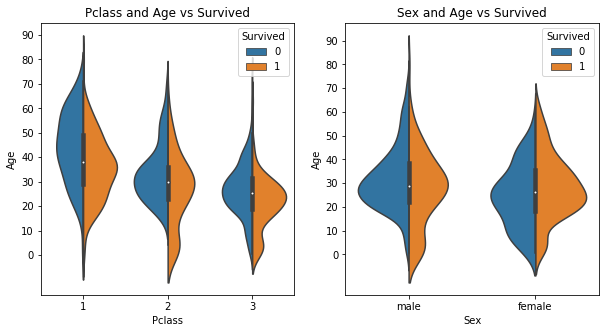

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train_data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')

ax[1].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=train_data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')

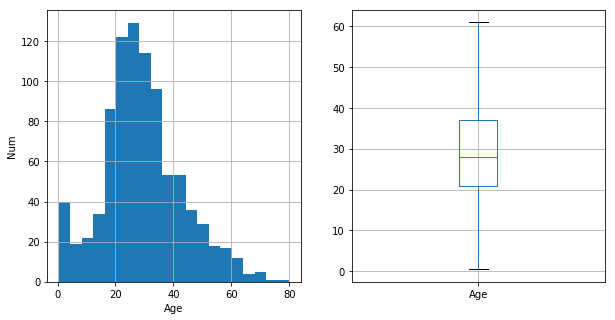

In [17]:
# 总体年龄分布
plt.figure(figsize=(10, 5))
plt.subplot(121)
train_data['Age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_data.boxplot(column='Age', showfliers=False)
plt.show()

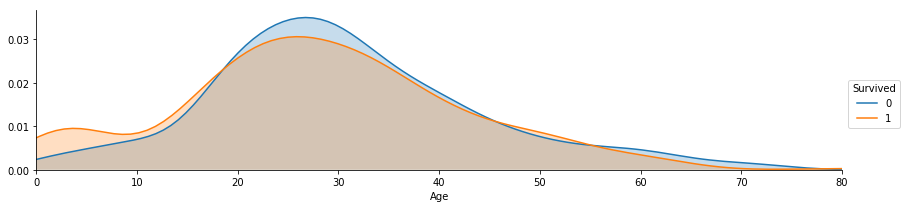

In [18]:
# 不同年龄下的生存和非生存的分布情况
facet = sns.FacetGrid(train_data, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

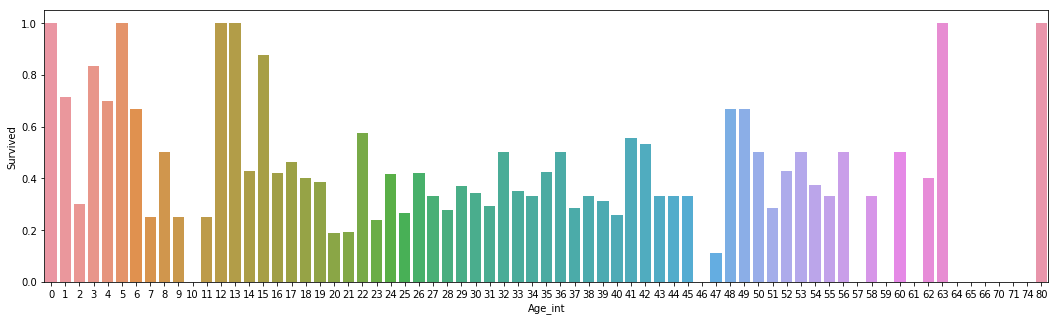

In [19]:
# 不同年龄下的平均生存率
fig, axis1 = plt.subplots(1,1, figsize=(18,5))
train_data['Age_int'] = train_data['Age'].astype(int)
average_age = train_data[['Age_int', 'Survived']].groupby(['Age_int'], as_index=False).mean()
sns.barplot(x='Age_int', y='Survived', data=average_age)

In [20]:
train_data['Age'].describe()

count    891.000000
mean      29.662418
std       13.738370
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data['Age'], bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64

### 3.5 称呼与存活的关系

In [23]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


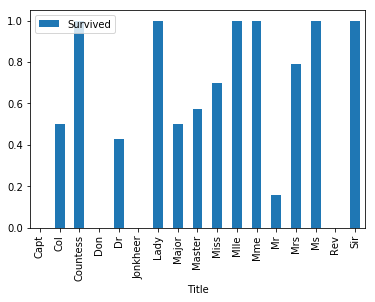

In [24]:
train_data[['Title', 'Survived']].groupby(['Title']).mean().plot.bar()

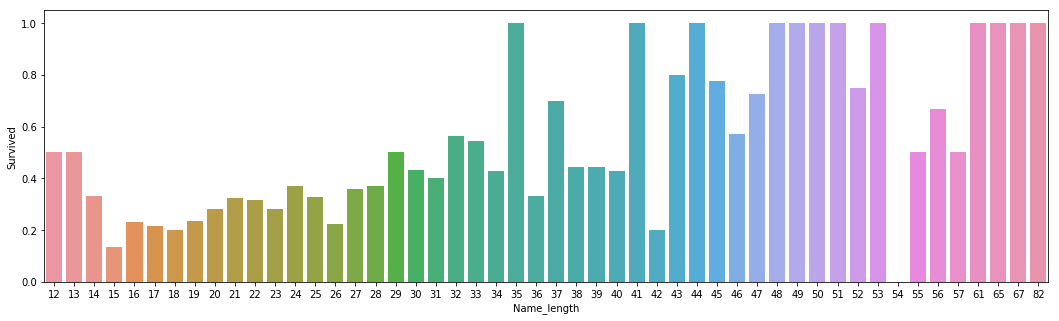

In [25]:
# 名字产犊和存活的关系
fig, axis1 = plt.subplots(1,1, figsize=(18,5))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length', 'Survived']].groupby(['Name_length'], as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=name_length)

### 3.6 有无兄弟姐妹和存活的关系

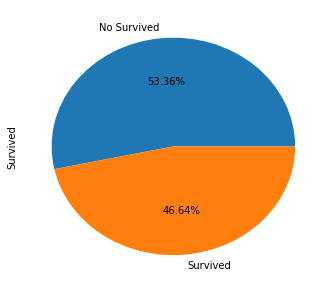

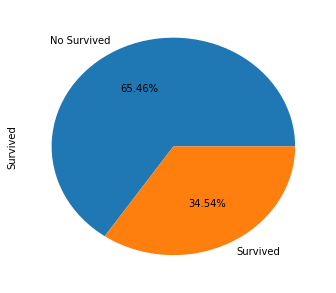

In [26]:
sibsp_df = train_data[train_data['SibSp'] !=0]
no_sibsp_df = train_data[train_data['SibSp'] ==0]

plt.figure(figsize=(12, 5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct='%1.2f%%')

plt.figure(figsize=(12, 5))
plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct='%1.2f%%')

### 3.7亲友人数和存活的关系

Text(0.5,1,'SibSpa adn Survived')

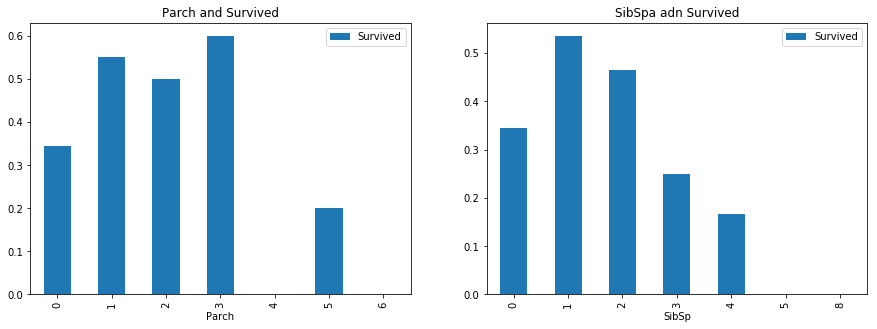

In [27]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
train_data[['Parch', 'Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')

train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSpa adn Survived')

### 3.8 票价分布和生存的关系

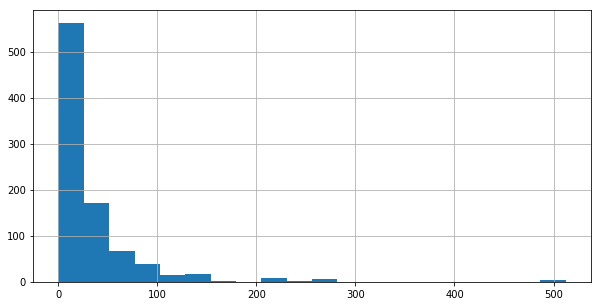

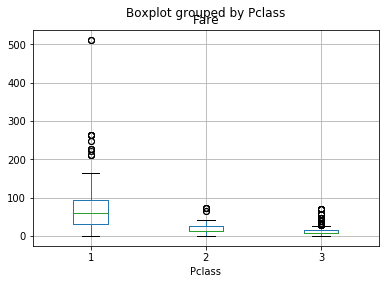

In [28]:
plt.figure(figsize=(10, 5))
train_data['Fare'].hist(bins=20)
train_data.boxplot(column='Fare', by='Pclass')
plt.show()

## 4.特征缩放

In [29]:
from sklearn import preprocessing 

# StandarScaler 将每个值减去平均值，然后再放缩到数据的方差
scaler = preprocessing.StandardScaler()
train_data['Age_scaled'] = scaler.fit_transform(train_data['Age'].values.reshape(-1,1))
train_data['Age_scaled'].head()

0   -0.558052
1    0.607224
2   -0.266733
3    0.388735
4    0.388735
Name: Age_scaled, dtype: float64

###  4.1 将连续数值离散化

In [30]:
train_data['Fare_bin'] = pd.qcut(train_data['Fare'], 5)
train_data['Fare_bin'][:3]

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

## 5. 特征工程
需要将训练数据和测试数据一起处理，使得具有相同的数据烈性和数据分布 

### 5.1 特征间相关性分析

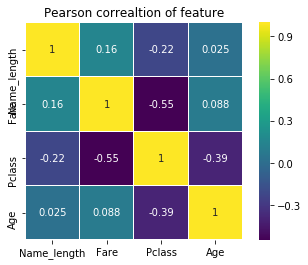

In [31]:
correlation = pd.DataFrame(train_data[['Name_length','Fare','Pclass','Age']])
colormap = plt.cm.viridis
plt.title('Pearson correaltion of feature')
sns.heatmap(correlation.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True)

#### 5.11 特征之间的数据分布图

In [32]:
g = sns.pairplot(train_data[['Survived', 'Name_length','Fare','Pclass','Age']],
                hue='Survived'b)

SyntaxError: invalid syntax (<ipython-input-32-7d8b58f678c8>, line 2)

## 6 模型测试及融合

### 6.1 利用不同的模型对特征进行筛选，选出较为重要的特征

In [ ]:
# 判断特征的重要性
from sklearn.feature_selection import SelectKBest, f_classif 

predictors = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
selector = SelectKBest(f_classif, k=5)
selector.fit(train_data[predictors], train_data['Survived'])
scores = -np.log(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [ ]:
# 随机森林选出top n 特征
from sklearn.ensemble import RandomForestCLassifier 